In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
df = pd.read_csv("./Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 99)

In [5]:
ridge_model = Ridge(alpha = 0.1).fit(x_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [6]:
ridge_model.coef_

array([ -0.44800007,   2.10070874,   6.74431873,  -1.65617827,
        -0.28632137,   2.48821583,   2.45389596,  -0.30319339,
         0.43764916,  -0.93086029,   1.79118752,   0.57830143,
        -0.34799318,   0.3090577 ,   0.25824903,  -6.31732153,
       126.97731786, -55.85827696, -53.92124913])

In [9]:
lambdas = 10**np.linspace(10, -2, 100)*0.5

In [10]:
ridge_model = Ridge()
coefs = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(x_train, y_train)
    coefs.append(ridge_model.coef_)

In [11]:
coefs

[array([ 7.90645940e-04,  2.52884601e-04,  4.45931783e-05,  1.54076134e-04,
         1.54868044e-04,  1.35704135e-04,  2.46571248e-05,  1.50040021e-02,
         4.38655827e-03,  5.24972473e-04,  2.37671698e-03,  2.22573403e-03,
         1.71940172e-03,  1.18835737e-03, -4.46296935e-05, -6.16778182e-06,
         3.30743966e-07, -1.00947898e-06,  2.94249929e-07]),
 array([ 1.02851155e-03,  3.29118100e-04,  5.79831727e-05,  2.00889677e-04,
         2.01162275e-04,  1.76091732e-04,  3.05497385e-05,  1.87901890e-02,
         5.50904784e-03,  6.63401684e-04,  2.99651292e-03,  2.80173934e-03,
         2.16404341e-03,  1.56778175e-03, -6.19662861e-05, -8.03742661e-06,
         4.40997446e-07, -1.33155318e-06,  3.87112792e-07]),
 array([ 1.33369243e-03,  4.27018524e-04,  7.51489916e-05,  2.61225204e-04,
         2.60386438e-04,  2.27655183e-04,  3.72159437e-05,  2.32214552e-02,
         6.83368044e-03,  8.29584729e-04,  3.73594844e-03,  3.48592449e-03,
         2.69197832e-03,  2.06730352e-03, 

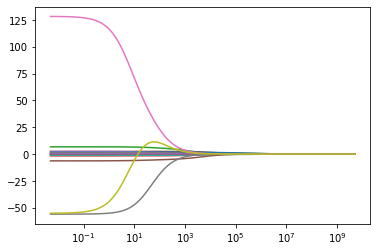

In [14]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")

In [16]:
ridge_model = Ridge().fit(x_train, y_train)
pred_y = ridge_model.predict(x_train)

In [18]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_train, pred_y))

In [19]:
#RMSE value for train set
RMSE

281.52099742294223

In [20]:
pred_y = ridge_model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test, pred_y))

In [21]:
#RMSE value for test set
RMSE

435.2108527074417

In [22]:
ridge_model = Ridge().fit(x_train, y_train)
pred_y = ridge_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, pred_y))

435.2108527074417

In [25]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas = lambdas, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [26]:
ridgecv.alpha_

0.5748784976988678

In [27]:
#Model Tuning with the Optimum Lambda
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(x_train, y_train)
pred_y = ridge_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, pred_y))

435.3625932167752